<a href="https://colab.research.google.com/github/farzan-ilias-2004/week2-covid19analysis-EDA/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

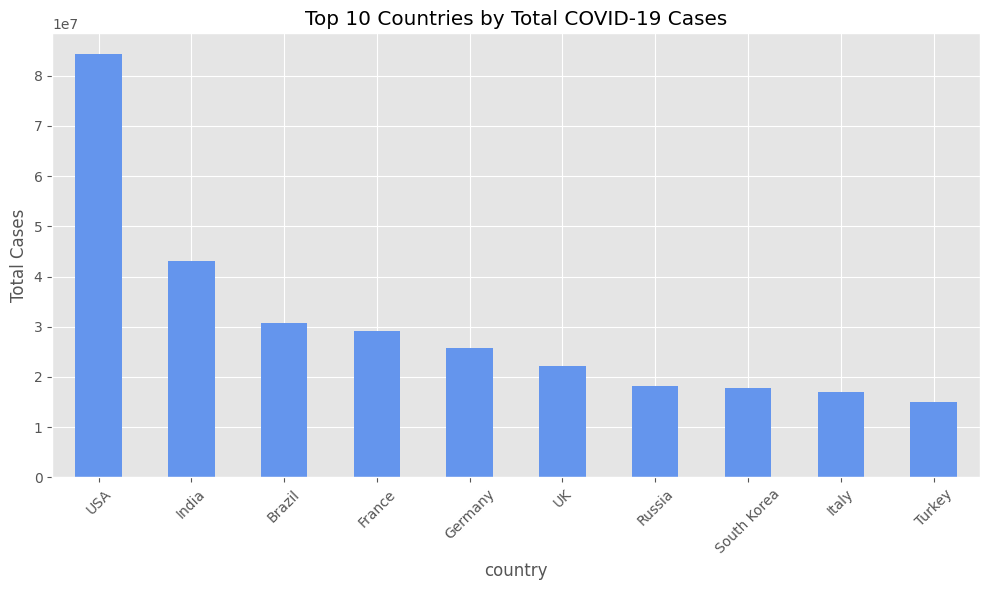

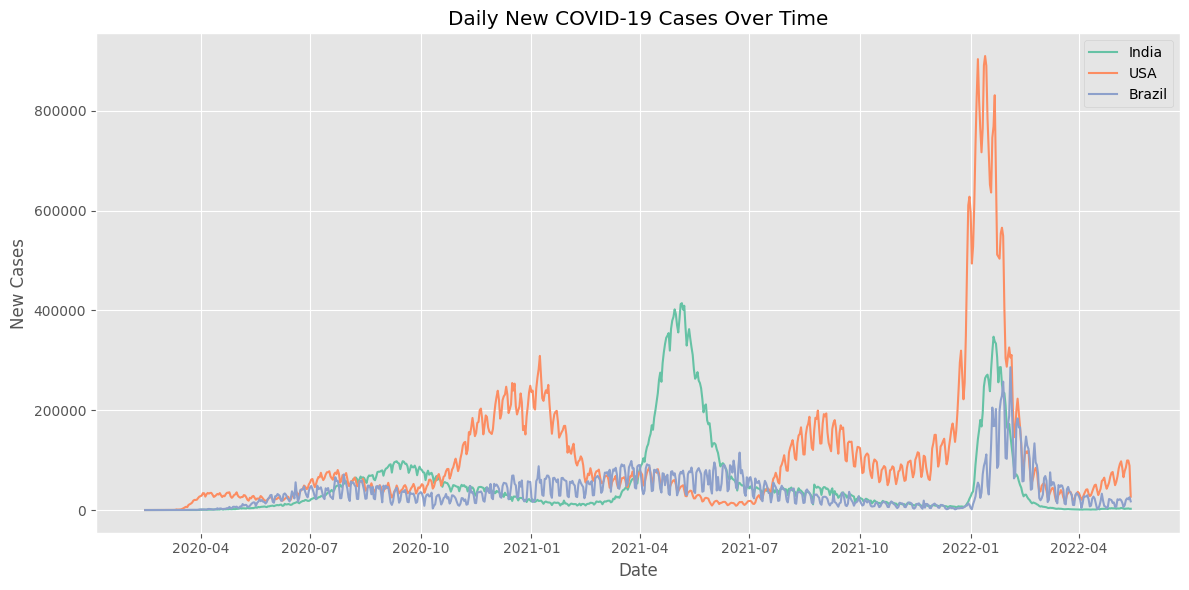

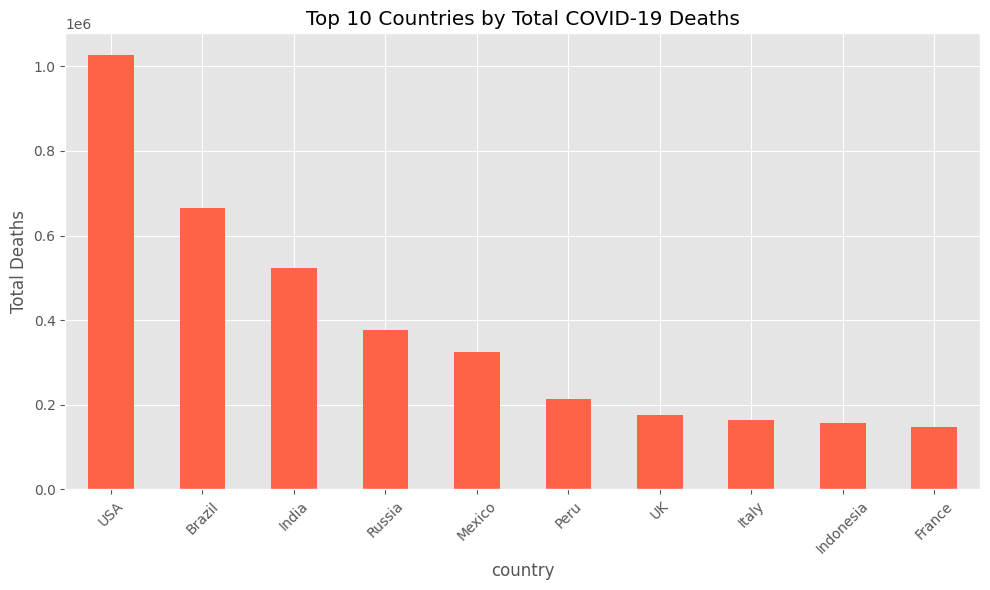

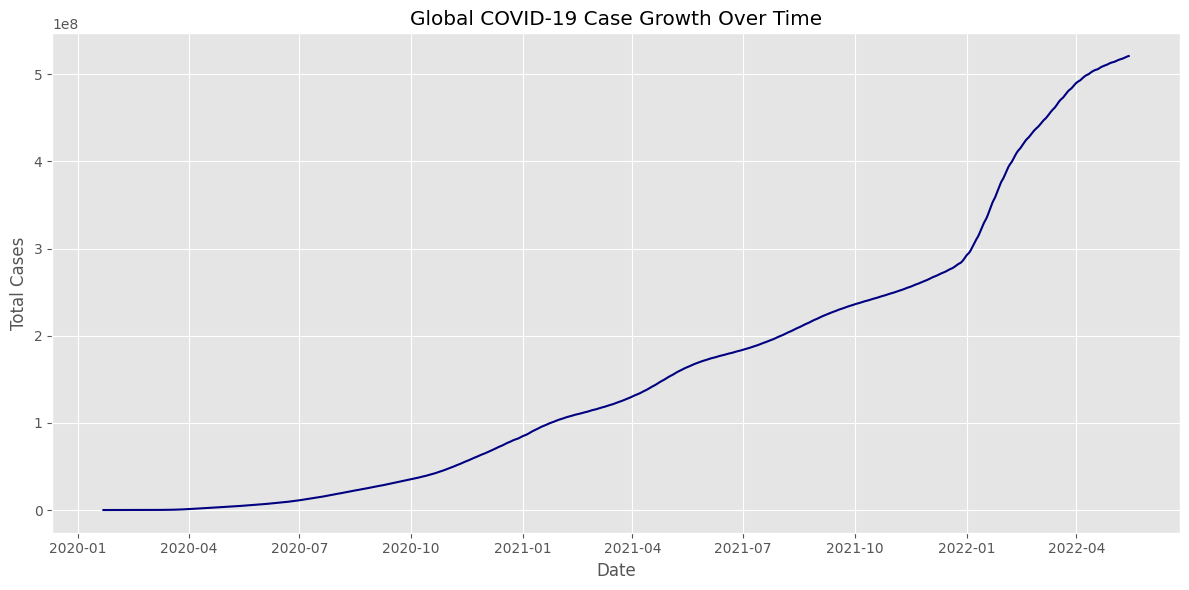

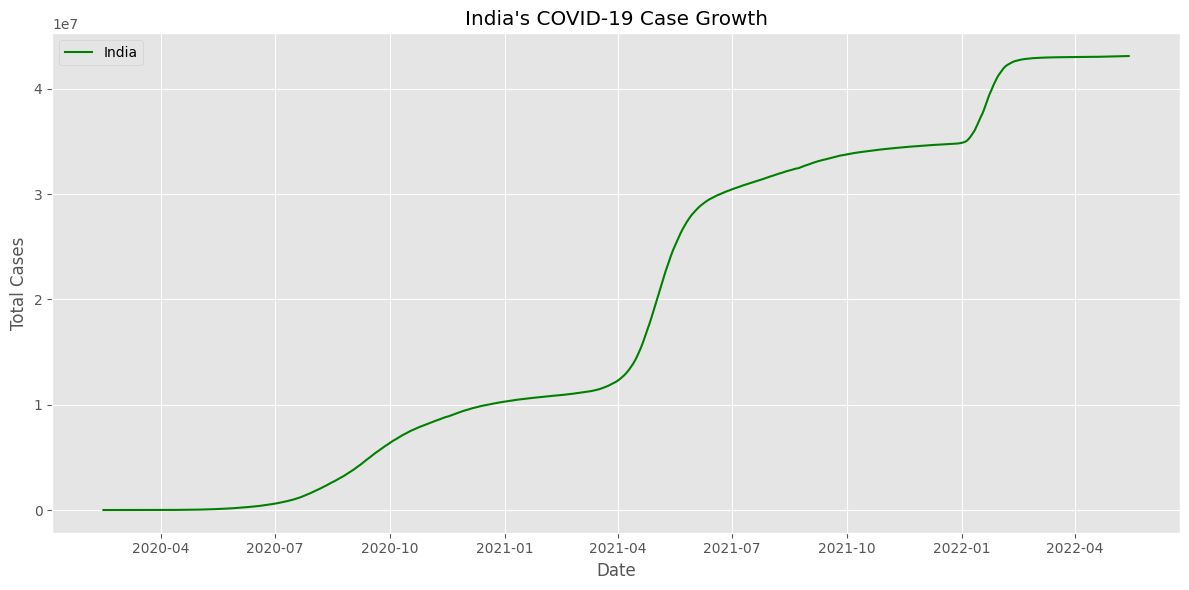

<ipython-input-9-2369153079>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['death_rate'] = (latest_data['cumulative_total_deaths'] / latest_data['cumulative_total_cases']) * 100
<ipython-input-9-2369153079>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=death_rate_top10, x='death_rate', y='country', palette='flare')


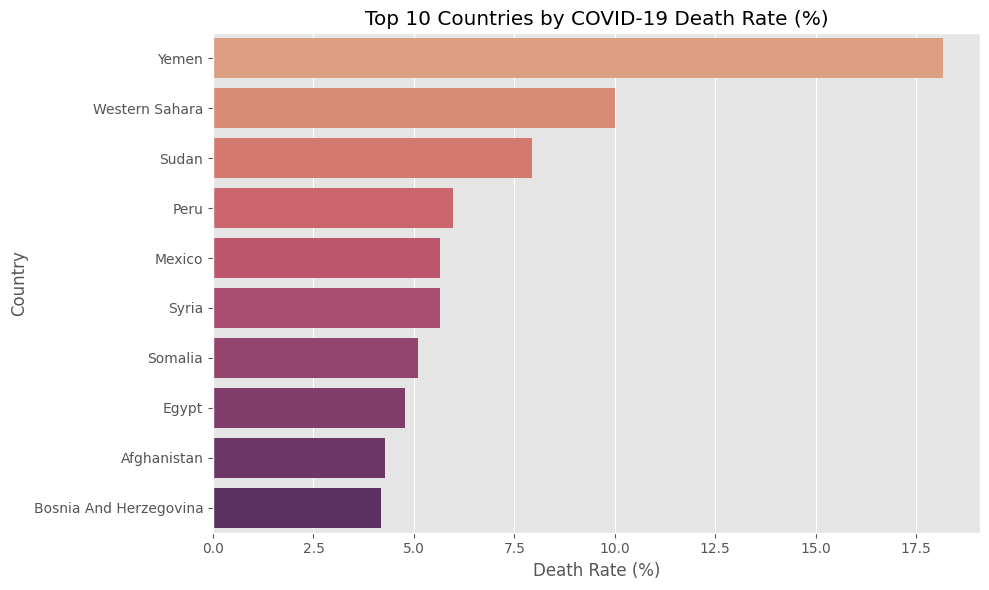

In [9]:
# COVID-19 Data Analysis using your dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid matplotlib style
plt.style.use('ggplot')  # alternatives: 'default', 'bmh', etc.
sns.set_palette("Set2")
%matplotlib inline

# Load your dataset
df = pd.read_csv("global.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing essential values
df.dropna(subset=['country', 'cumulative_total_cases'], inplace=True)

# Fill missing numeric values with 0
df.fillna(0, inplace=True)

# 🔍 1. Top 10 countries by total cases (latest date)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
top10_cases = latest_data.groupby('country')['cumulative_total_cases'].sum().nlargest(10)

plt.figure(figsize=(10,6))
top10_cases.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 2. Daily New Cases Over Time – India, USA, Brazil
countries = ['India', 'USA', 'Brazil']
plt.figure(figsize=(12,6))

for country in countries:
    country_data = df[df['country'].str.lower() == country.lower()]
    if not country_data.empty:
        plt.plot(country_data['date'], country_data['daily_new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

# 🪦 3. Bar Chart: Total Deaths (Top 10 Countries)
top10_deaths = latest_data.groupby('country')['cumulative_total_deaths'].sum().nlargest(10)

plt.figure(figsize=(10,6))
top10_deaths.plot(kind='bar', color='tomato')
plt.title('Top 10 Countries by Total COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🌍 4. Global Case Growth Over Time
global_cases = df.groupby('date')['cumulative_total_cases'].sum()

plt.figure(figsize=(12,6))
plt.plot(global_cases.index, global_cases.values, color='navy')
plt.title('Global COVID-19 Case Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

# 🇮🇳 5. India Case Growth
india_data = df[df['country'].str.lower() == 'india']

plt.figure(figsize=(12,6))
plt.plot(india_data['date'], india_data['cumulative_total_cases'], label='India', color='green')
plt.title("India's COVID-19 Case Growth")
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

# 💀 6. Bonus – Death Rate Calculation
latest_data['death_rate'] = (latest_data['cumulative_total_deaths'] / latest_data['cumulative_total_cases']) * 100
death_rate_top10 = latest_data[['country', 'death_rate']].dropna().sort_values(by='death_rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=death_rate_top10, x='death_rate', y='country', palette='flare')
plt.title('Top 10 Countries by COVID-19 Death Rate (%)')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
